In [8]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator

grid_width = 10
grid_height = 10
accumulated_sidelength = 0
arr = np.full((grid_height, grid_width), 'white', dtype=object)
invalid = False

start_row = (grid_height) // 2 - 1
start_col = (grid_width) // 2 - 1


arr[start_row:start_row+1, start_col:start_col+1] = 'blue'

colors = ['red', 'green', 'yellow', 'orange', 'purple', 'blue', 'pink', 'brown']
colorit = iter(colors)
def get_sidelength_and_place_square(direction):
    global invalid
    global colorit
    try:
        current_color = next(colorit)
    except StopIteration:
        colorit = iter(colors)
        current_color = next(colorit)
    upmost = None
    downmost = None
    for col in arr.transpose():
        col = col[::-1]
        non_white_strings_exist = np.any(col != "white")
        if non_white_strings_exist:
            indices = np.where(col != 'white')[0]

            if upmost is None:
                upmost = len(col) - indices[0] - 1
            if downmost is None:
                downmost = len(col) - indices[-1] - 1
            if upmost is not None and downmost is not None:
                break




    for row in arr:
        non_white_strings_exist = np.any(row != "white")
        if non_white_strings_exist:
            indices = np.where(row != 'white')[0]
            leftmost = indices[0]
            rightmost = indices[-1]
            break
    def make_space(sidelength):
        global arr
        global grid_height
        global grid_width
        arr = np.pad(arr, pad_width=round(sidelength/2 + 1), mode='constant', constant_values='white')
        grid_width = len(arr[0])
        grid_height = len(arr[0])

    if direction == 'right':
        sidelength = upmost - downmost + 1
        print('sidelength:', sidelength)
        top_right = (upmost, rightmost + sidelength)
        bottom_left = (downmost, rightmost+1)
        arr[bottom_left[0]:top_right[0] + 1, bottom_left[1]:top_right[1] + 1][:] = current_color

    if direction == 'left':
        sidelength = upmost - downmost + 1
        print('sidelength:', sidelength)
        top_right = (upmost, leftmost - 1)
        bottom_left = (downmost, leftmost - sidelength)
        arr[bottom_left[0]:top_right[0] + 1, bottom_left[1]:top_right[1] + 1][:] = current_color

    if direction == 'up':
        sidelength = rightmost - leftmost + 1
        print('sidelength:', sidelength)
        bottom_left = (upmost + 1, leftmost)
        top_right = (upmost + sidelength, rightmost)
        arr[bottom_left[0]:top_right[0] + 1, bottom_left[1]:top_right[1] + 1][:] = current_color

    if direction == 'down':
        sidelength = rightmost - leftmost + 1
        print('sidelength:', sidelength)
        bottom_left = (downmost - sidelength, leftmost)
        top_right = (downmost - 1, rightmost)
        arr[bottom_left[0]:top_right[0] + 1, bottom_left[1]:top_right[1] + 1][:] = current_color

    make_space(sidelength=sidelength)



def plot(width, height):
    global grid_height
    global grid_width
    fig, ax = plt.subplots()
    for i in range(grid_height):
        for j in range(grid_width):
            color = arr[i][j]
            ax.add_patch(plt.Rectangle((j, i), 1, 1, color=color))
    ax.set_xlim(0, grid_width)
    ax.set_ylim(0, grid_height)


    if grid_width < 50:
        ax.grid(True)
        plt.pause(0.5)
        ax.axis('on')
        ax.xaxis.set_major_locator(MultipleLocator(1))
        ax.yaxis.set_major_locator(MultipleLocator(1))
    plt.show()


sidelength: 1


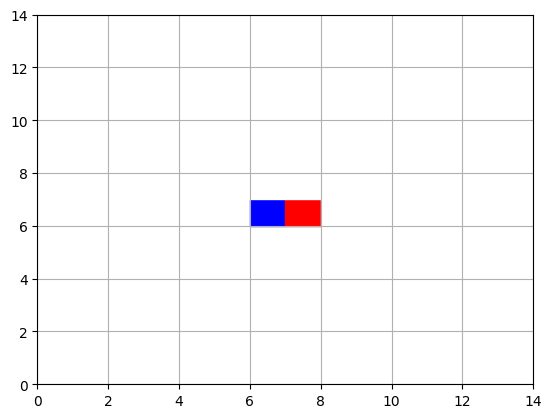

sidelength: 2


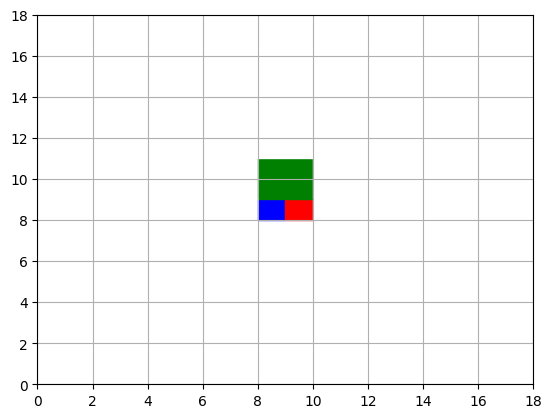

sidelength: 3


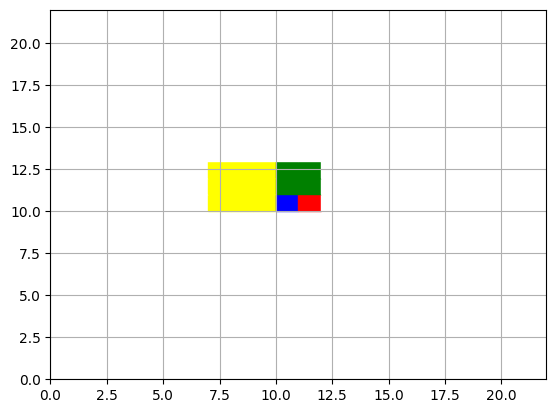

sidelength: 5


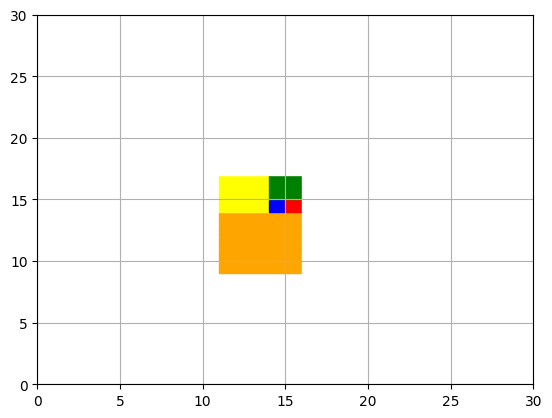

sidelength: 8


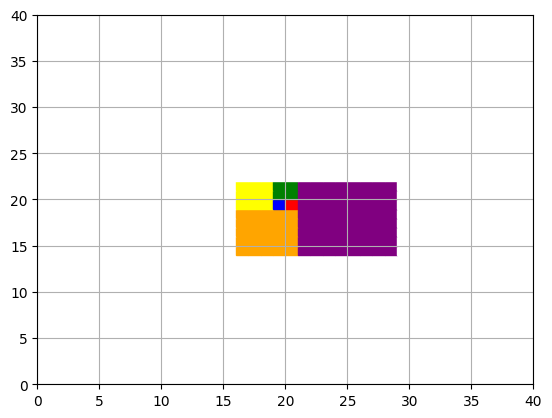

sidelength: 13


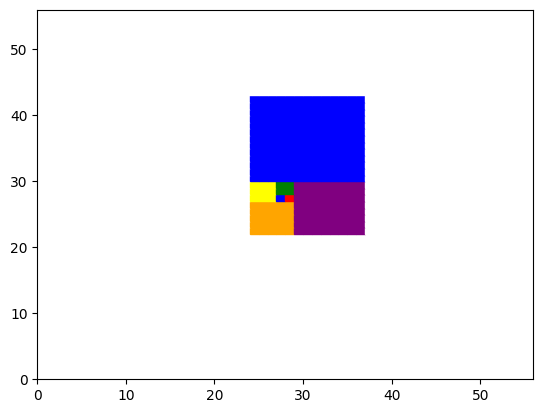

sidelength: 21


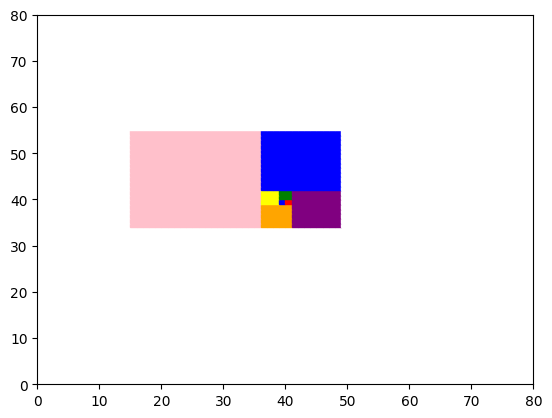

sidelength: 34


KeyboardInterrupt: 

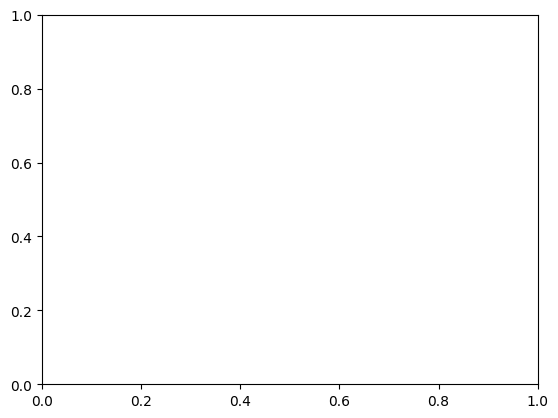

In [9]:
def event_loop():
    for i in range(3):
        for direction in ['right', 'up', 'left', 'down']:
            get_sidelength_and_place_square(direction)
            plot(grid_width, grid_height)

event_loop()
print('done!')